In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import *
import json
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load and explore the dataset
print("Loading dataset...")
data = load_json_data('../data/raw/News_Category_Dataset_v3.json')
print(f"Total articles loaded: {len(data)}")

Loading dataset...
Total articles loaded: 209527


In [4]:
# Convert to DataFrame
df = pd.DataFrame(data)
print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())


Dataset shape: (209527, 6)

First few rows:
                                                link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...       

In [5]:
# Basic data exploration
print("\n=== Dataset Information ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Basic Statistics ===")
print(df.describe())


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209527 non-null  object
 2   category           209527 non-null  object
 3   short_description  209527 non-null  object
 4   authors            209527 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB
None

=== Missing Values ===
link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

=== Basic Statistics ===
                                                     link        headline  \
count                                              209527          209527   
unique                                             209486          207996   



=== Category Distribution ===


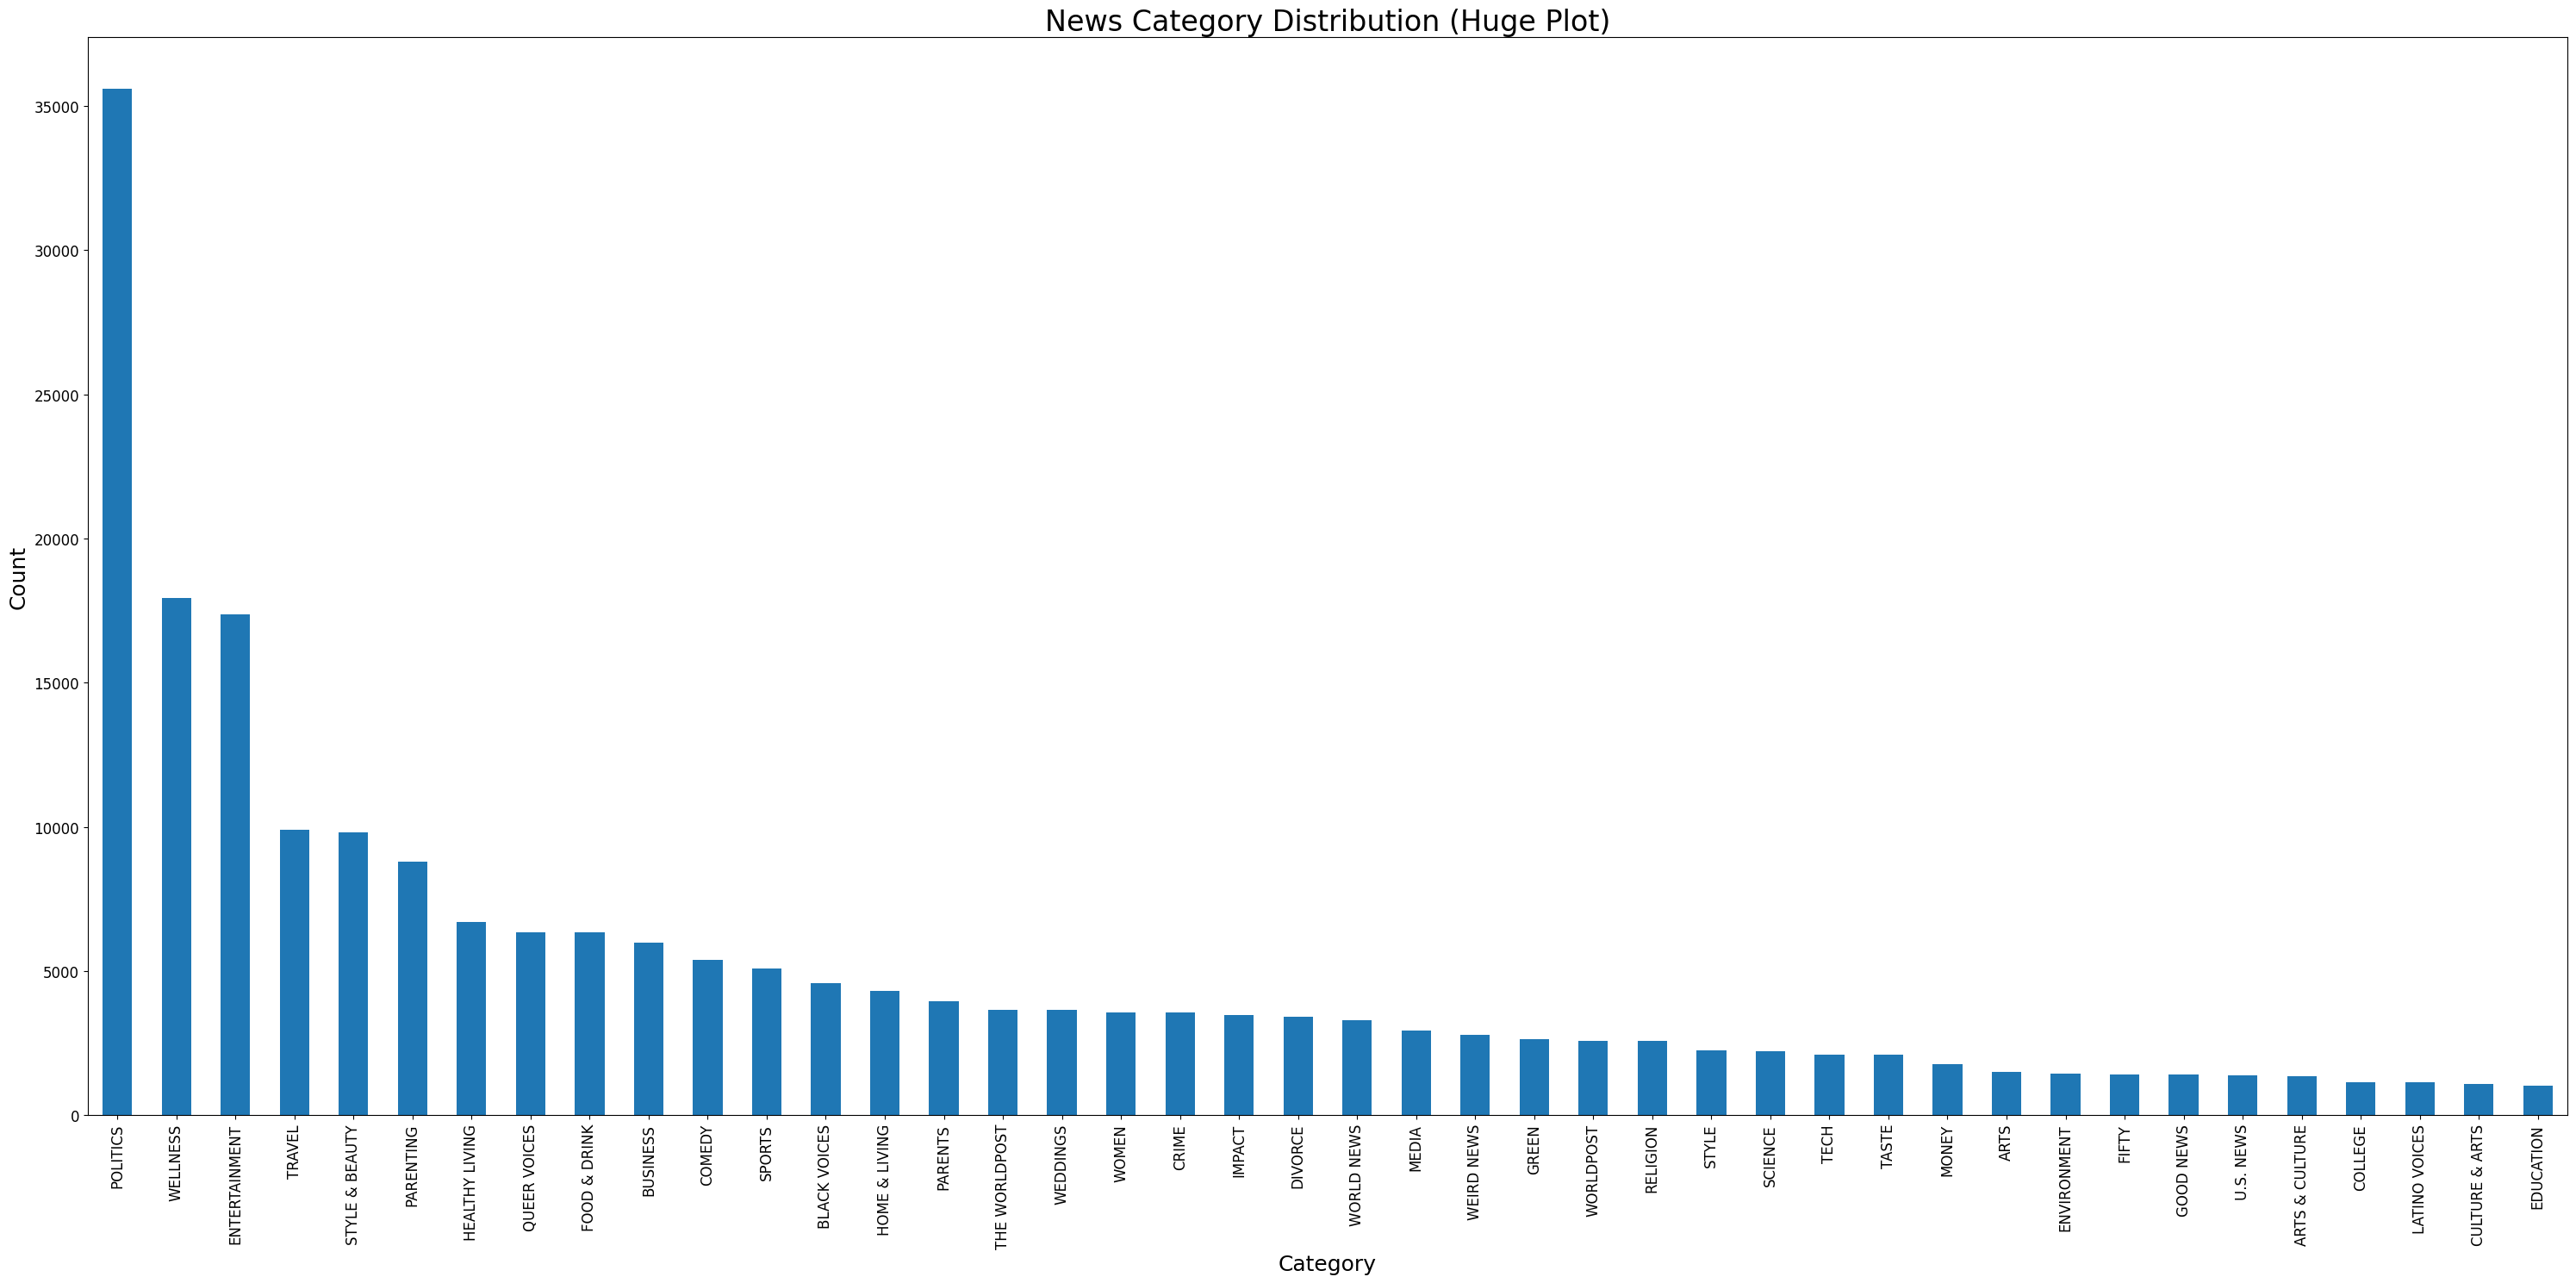

Top 10 categories:
category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64


In [6]:
# Analyze category distribution
def plot_class_distribution(series, title):
    plt.figure(figsize=(30, 15))  # make the figure huge
    category_counts = series.value_counts()
    category_counts.plot(kind='bar')
    plt.title(title, fontsize=24)
    plt.xlabel("Category", fontsize=18)
    plt.ylabel("Count", fontsize=18)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    return category_counts


print("\n=== Category Distribution ===")
category_counts = plot_class_distribution(df['category'], "News Category Distribution (Huge Plot)")
print("Top 10 categories:")
print(category_counts.head(10))

Text(0, 0.5, 'Frequency')

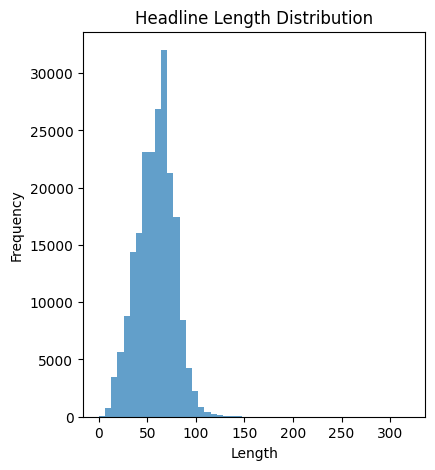

In [7]:
# Analyze text length distribution
df['headline_length'] = df['headline'].str.len()
df['description_length'] = df['short_description'].str.len()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['headline_length'], bins=50, alpha=0.7)
plt.title('Headline Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

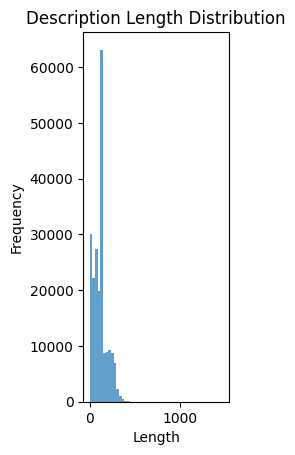

In [8]:
plt.subplot(1, 3, 2)
plt.hist(df['description_length'], bins=50, alpha=0.7)
plt.title('Description Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

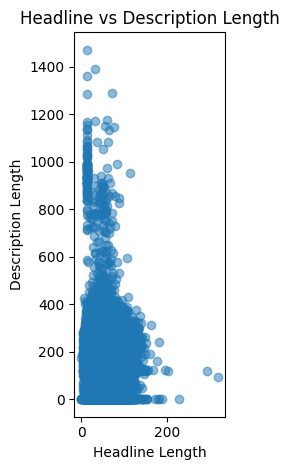

In [9]:
plt.subplot(1, 3, 3)
plt.scatter(df['headline_length'], df['description_length'], alpha=0.5)
plt.title('Headline vs Description Length')
plt.xlabel('Headline Length')
plt.ylabel('Description Length')
plt.tight_layout()
plt.show()

In [10]:
# Text preprocessing functions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
# Download NLTK resources
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

In [12]:
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

In [13]:
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\varal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        
    def clean_text(self, text):
        if not isinstance(text, str):
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords and lemmatize
        tokens = [self.lemmatizer.lemmatize(token) for token in tokens 
                 if token not in self.stop_words and len(token) > 2]
        
        return ' '.join(tokens)

In [15]:
# Preprocess the text data
print("Starting text preprocessing...")
preprocessor = TextPreprocessor()

Starting text preprocessing...


In [16]:
# Combine headline and description for better context
df['combined_text'] = df['headline'] + ' ' + df['short_description'].fillna('')

In [17]:
# Clean the text
df['cleaned_text'] = df['combined_text'].apply(preprocessor.clean_text)

In [18]:
print("Text preprocessing completed!")
print(f"Sample cleaned text: {df['cleaned_text'].iloc[0][:200]}...")

Text preprocessing completed!
Sample cleaned text: million american roll sleeve omicrontargeted covid booster health expert said early predict whether demand would match million dos new booster ordered fall...


In [19]:
# Handle class imbalance
# Let's work with top 10 categories to manage complexity
top_categories = category_counts.head(10).index
df_filtered = df[df['category'].isin(top_categories)].copy()

Filtered dataset shape: (124787, 10)


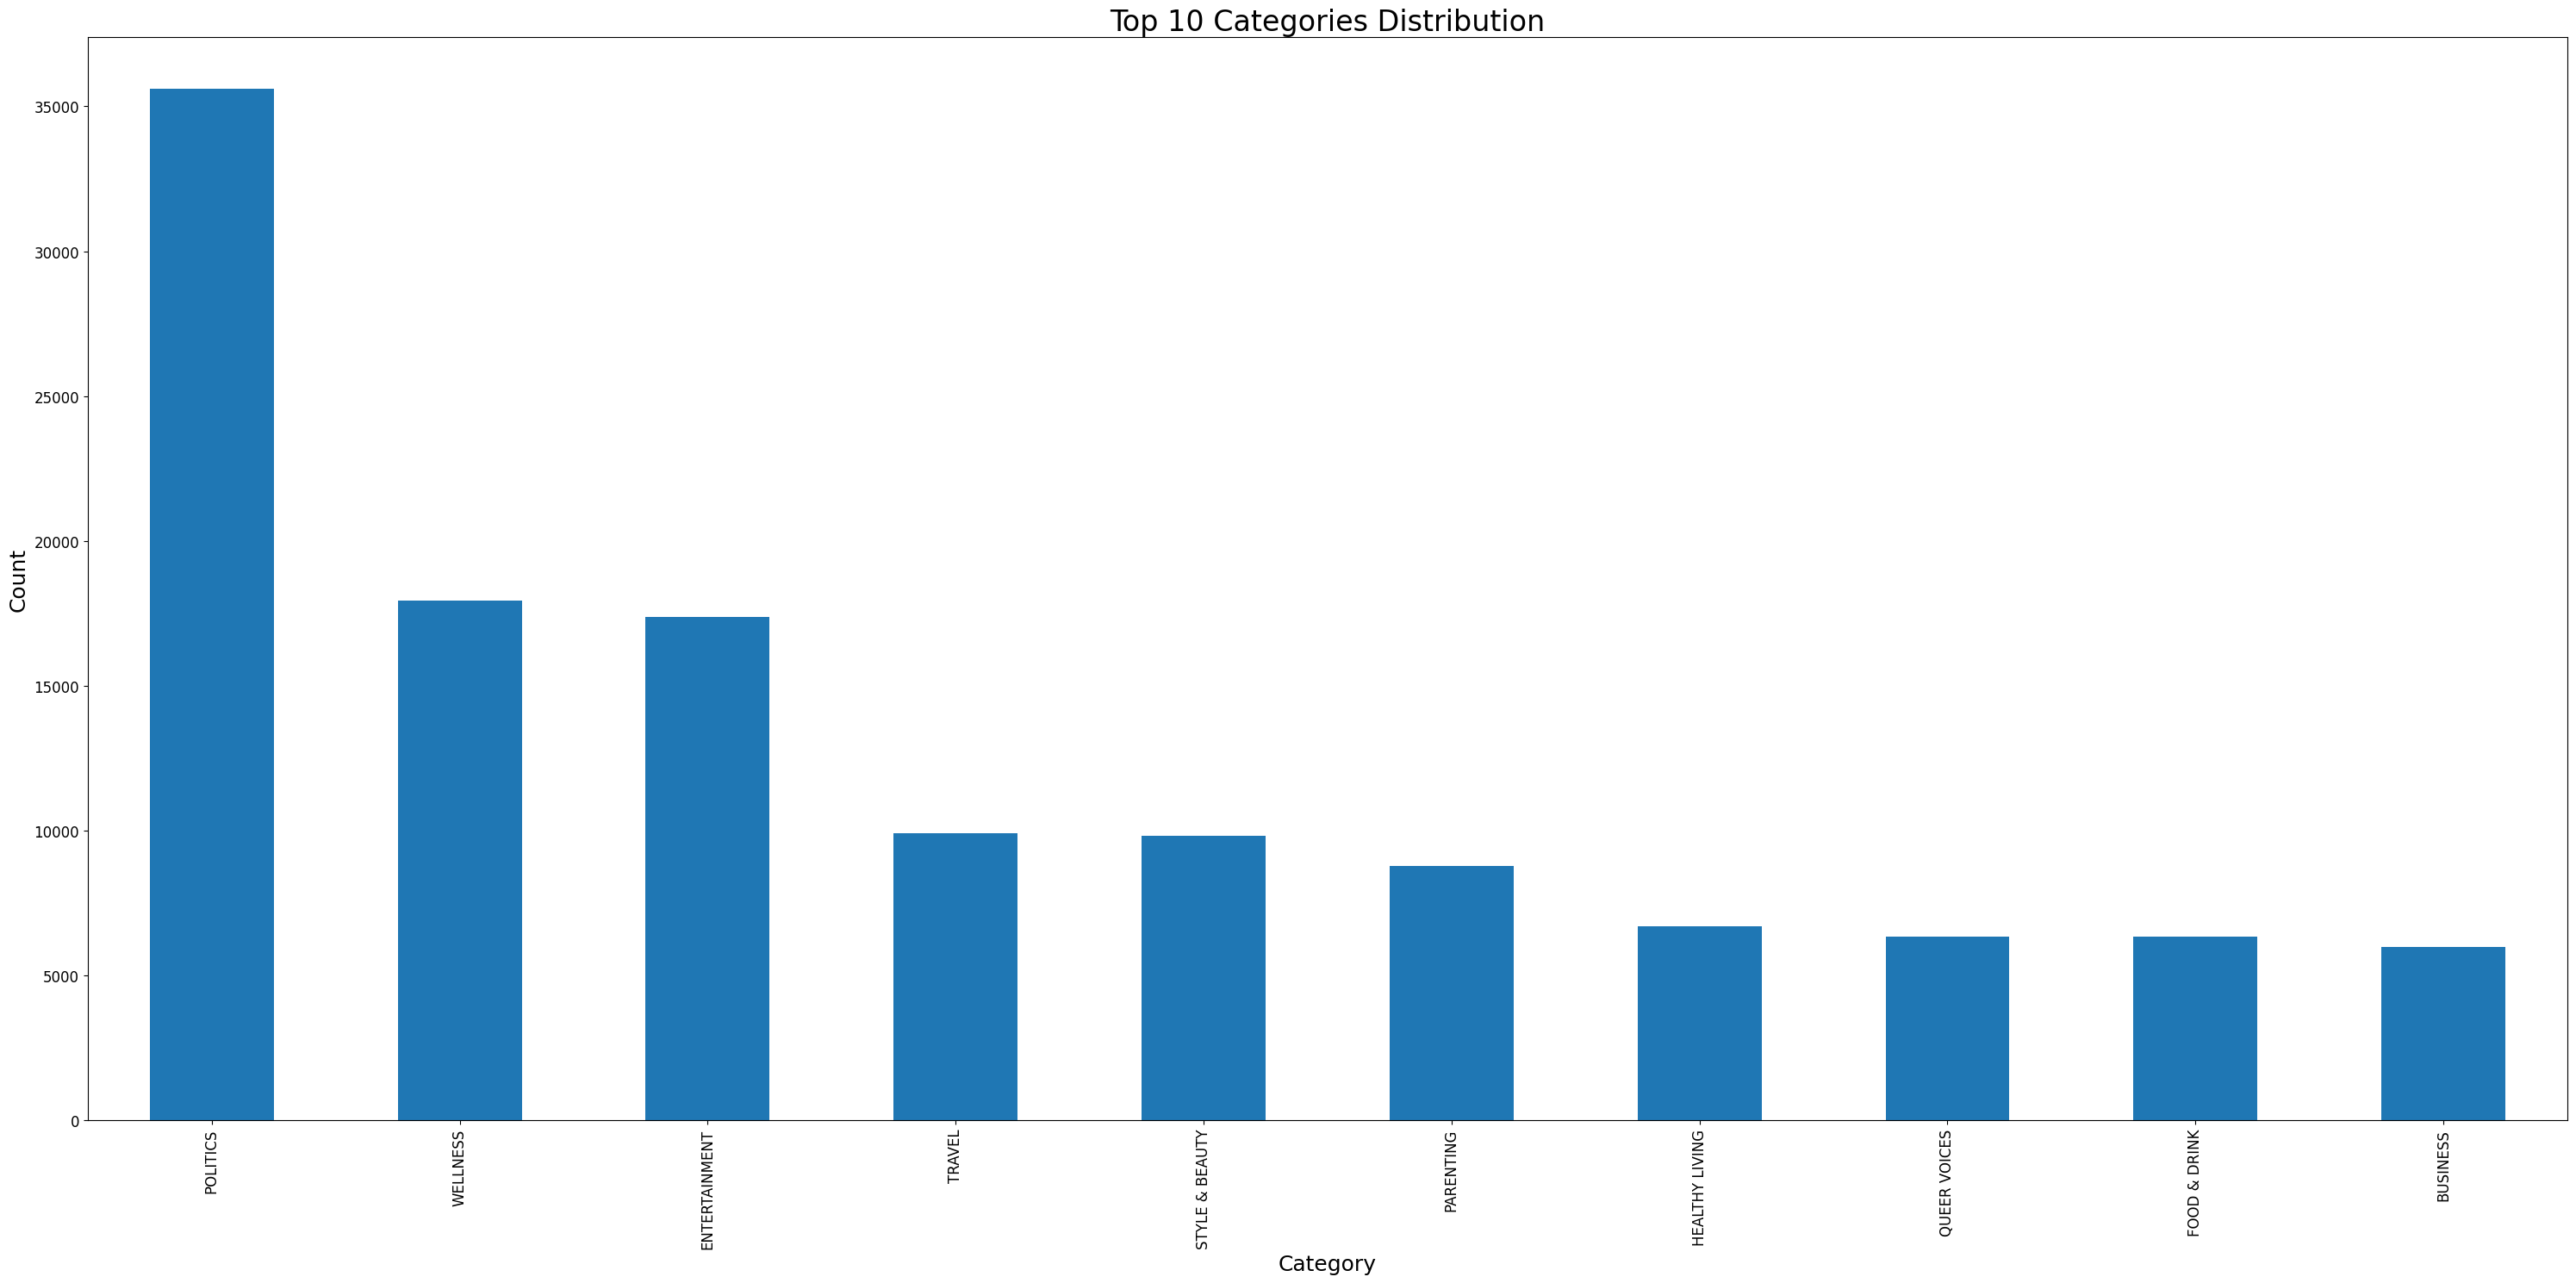

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

In [20]:
print(f"Filtered dataset shape: {df_filtered.shape}")
plot_class_distribution(df_filtered['category'], "Top 10 Categories Distribution")

In [21]:
# Encode labels
label_encoder = LabelEncoder()
df_filtered['label_encoded'] = label_encoder.fit_transform(df_filtered['category'])

In [22]:
print("Label encoding completed!")
print("Category mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{i}: {category}")

Label encoding completed!
Category mapping:
0: BUSINESS
1: ENTERTAINMENT
2: FOOD & DRINK
3: HEALTHY LIVING
4: PARENTING
5: POLITICS
6: QUEER VOICES
7: STYLE & BEAUTY
8: TRAVEL
9: WELLNESS


In [23]:
# Train-validation-test split
X = df_filtered['cleaned_text']
y = df_filtered['label_encoded']

In [24]:
# First split: separate test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

In [25]:
# Second split: train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.15, random_state=42, stratify=y_temp
)

In [26]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 90157 samples
Validation set: 15911 samples
Test set: 18719 samples


In [27]:
# Save processed data
save_processed_data({
    'X_train': X_train,
    'X_val': X_val, 
    'X_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test,
    'label_encoder': label_encoder,
    'df_filtered': df_filtered
}, 'processed_data.pkl')

print("Processed data saved successfully!")

Processed data saved successfully!
